# MatPlotLib plot típusok
Az alapok átnézése után nézzünk meg egy néhány másik plot típust is.
A megfelelő plot típus kiválasztása az egyik legfontosabb lépés a plot elkészítésésnél, hiszen rengeteg nagyon jó formátum létezik, viszont mindegyiknek más az erőssége.

Ha nem tudjuk, hogy mivel induljunk inspirációnak ajánlom a következő oldalt:

https://matplotlib.org/stable/gallery/index.html

Ebben a Notebookban a leggyakrabban használt plot típusokon megyünk végig egy pár hasznos beállításukkal, de fenti linken minden verzióra található egy egyszerű példa, amiből ki lehet indulni.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Bar plot
Az oszlopdiagramot valószínűleg senkinek nem kell bemutatnom, és természetesen matplotlibben is megtalálható.

In [2]:
caeSzabi21 = {'Január':20, 'Február':10, 'Március': 2, 'Április':4, 'Május':8, 'Június':22, 'Július':50, 'Augusztus':72, 'Szeptember':25}
honapok = list(caeSzabi21.keys())
szabik = list(caeSzabi21.values())

<BarContainer object of 9 artists>

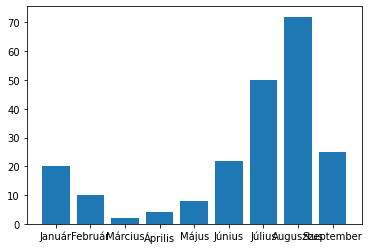

In [3]:
plt.bar(honapok, szabik)

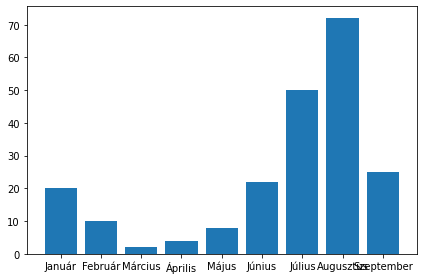

In [4]:
plt.bar(honapok, szabik)
plt.tight_layout()
plt.show()

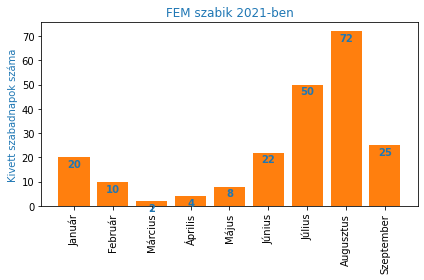

In [5]:
fig, ax = plt.subplots()
ax.bar(honapok, szabik, color='C1')
ax.set_title("FEM szabik 2021-ben", color='C0')
ax.set_ylabel("Kivett szabadnapok száma", color='C0')
# Rotate ticks
plt.xticks(rotation = 90)
# Add labeling
for i, v in enumerate(szabik):
    ax.text(i, v + -5, str(v), color='C0', fontweight='bold', ha='center', va='bottom')
# Auto labeling added from matplotlib verison 3.4 (see ax.bar_label())
plt.tight_layout()

Oszlopdiagrammoknál sokszor szeretnénk az adatokat tovább csoportosítani, hogy két adatsor egymáshoz képesti viszonyát vizsgáljuk.
Ennek a Megoldása MatPlotLibben valamivel komplikáltabb, mint ahogy annak lennie kellene, de természetesen ez is megoldható.
A trükk az, hogy az oszlopokat kézzel kicsit el kell tolni egymáshoz képest az X tengelyen, illetve a szélességüket is megfeleő módon be kell állítani.
### Adatok beolvasása

In [6]:
import csv
with open('CAEszabi.csv') as szabiFile:
    szabireader = csv.reader(szabiFile, delimiter=';')
    for row in szabireader:
        print(', '.join(row))

Month, FEM, BMW, COMP, ADMIN, SUM
Jan, 7, 0, 4, 9, 20
Febr, 4, 0, 0, 6, 10
Márc, 1, 0, 0, 1, 2
Ápr, 1, 1, 0, 2, 4
Máj, 3, 0, 2, 3, 8
Jún, 3, 5, 8, 6, 22
Júl, 10, 18, 10, 12, 50
Aug, 31, 16, 8, 17, 72
Szept, 13, 8, 4, 0, 25
Okt, 3, 3, 1, 3, 10
Nov, 0, 3, 4, 0, 7
Dec, 35, 30, 24, 15, 104
Unplanned, 44, 12, 24, 17, 97


In [7]:
from collections import defaultdict

szabiData = defaultdict(list)
months = []
with open('CAEszabi.csv') as szabiFile:
    szabireader = csv.DictReader(szabiFile, delimiter=';')
    for row in szabireader:
#         print(row)
        for group in ['FEM', 'BMW', 'COMP', 'ADMIN', 'SUM']:
            szabiData[group].append(int(row[group]))
        months.append(row['Month'])
    else:
        for group in ['FEM', 'BMW', 'COMP', 'ADMIN', 'SUM']:
            szabiData[group] = np.array(szabiData[group]) 
print(szabiData)
print(months)

defaultdict(<class 'list'>, {'FEM': array([ 7,  4,  1,  1,  3,  3, 10, 31, 13,  3,  0, 35, 44]), 'BMW': array([ 0,  0,  0,  1,  0,  5, 18, 16,  8,  3,  3, 30, 12]), 'COMP': array([ 4,  0,  0,  0,  2,  8, 10,  8,  4,  1,  4, 24, 24]), 'ADMIN': array([ 9,  6,  1,  2,  3,  6, 12, 17,  0,  3,  0, 15, 17]), 'SUM': array([ 20,  10,   2,   4,   8,  22,  50,  72,  25,  10,   7, 104,  97])})
['Jan', 'Febr', 'Márc', 'Ápr', 'Máj', 'Jún', 'Júl', 'Aug', 'Szept', 'Okt', 'Nov', 'Dec', 'Unplanned']


### Csoportosított oszlopdiagram

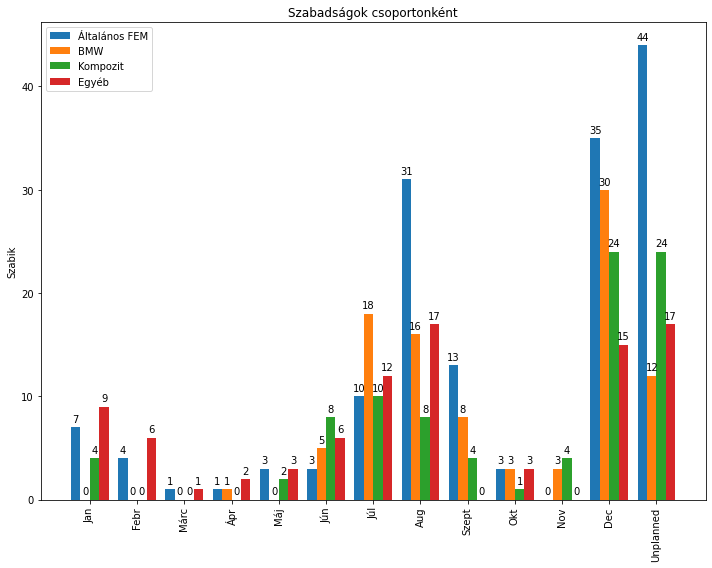

In [8]:
x = np.arange(len(months))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
femPlot = ax.bar(x - 3*width/2, height=szabiData['FEM'], width=width, label='Általános FEM')
bmwPlot = ax.bar(x - width/2, height=szabiData['BMW'], width=width, label='BMW')
compPlot = ax.bar(x + width/2, height=szabiData['COMP'], width=width, label='Kompozit')
adminPlot = ax.bar(x + 3*width/2, height=szabiData['ADMIN'], width=width, label='Egyéb')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Szabik')
ax.set_title('Szabadságok csoportonként')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

ax.bar_label(femPlot, padding=3)
ax.bar_label(bmwPlot, padding=3)
ax.bar_label(compPlot, padding=3)
ax.bar_label(adminPlot, padding=3)

plt.xticks(rotation = 90)

fig.tight_layout()

plt.show()

### Halmozott oszlopdiagram (új stílusban)

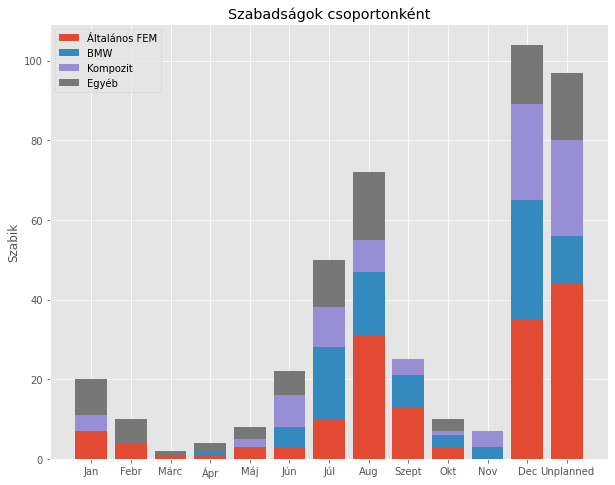

In [9]:
# Use an other plot style
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,8))
femPlot = ax.bar(x, height=szabiData['FEM'], bottom = 0,  label='Általános FEM')
bmwPlot = ax.bar(x, height=szabiData['BMW'], bottom = szabiData['FEM'], label='BMW')
compPlot = ax.bar(x, height=szabiData['COMP'], bottom = szabiData['FEM'] + szabiData['BMW'], label='Kompozit')
adminPlot = ax.bar(x, height=szabiData['ADMIN'], bottom = szabiData['FEM'] + szabiData['BMW'] + szabiData['COMP'],
                   label='Egyéb')

ax.set_ylabel('Szabik')
ax.set_title('Szabadságok csoportonként')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

Ugyanez a csoportok létszámára leosztva:

In [10]:
femNum = 7
bmwNum = 4
compNum = 4
adminNum = 3   

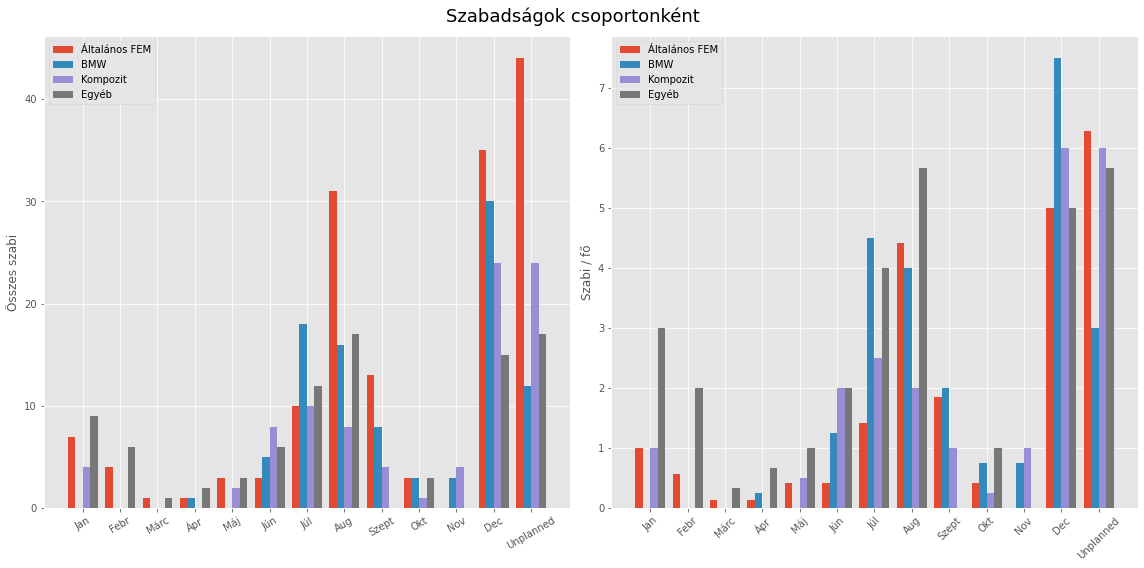

In [11]:
fig, ax = plt.subplots(1,2, figsize=(16,8), sharey=False)

femPlot = ax[0].bar(x - 3*width/2, height=szabiData['FEM'], width=width, label='Általános FEM')
bmwPlot = ax[0].bar(x - width/2, height=szabiData['BMW'], width=width, label='BMW')
compPlot = ax[0].bar(x + width/2, height=szabiData['COMP'], width=width, label='Kompozit')
adminPlot = ax[0].bar(x + 3*width/2, height=szabiData['ADMIN'], width=width, label='Egyéb')

femPlot = ax[1].bar(x - 3*width/2, height=szabiData['FEM']/femNum, width=width, label='Általános FEM')
bmwPlot = ax[1].bar(x - width/2, height=szabiData['BMW']/bmwNum, width=width, label='BMW')
compPlot = ax[1].bar(x + width/2, height=szabiData['COMP']/compNum, width=width, label='Kompozit')
adminPlot = ax[1].bar(x + 3*width/2, height=szabiData['ADMIN']/adminNum, width=width, label='Egyéb')

fig.suptitle('Szabadságok csoportonként', fontsize = 18)
ax[0].set_ylabel('Összes szabi')
ax[0].set_xticks(x)
ax[0].set_xticklabels(months, rotation=30)
ax[0].legend()
ax[1].set_ylabel('Szabi / fő')
ax[1].set_xticks(x)
ax[1].set_xticklabels(months, rotation=45)
ax[1].legend()


plt.tight_layout()

## Scattet plot
Amikor nem egy folytonos adatsort szeretnénk megjeleníteni, csak összetartozó pontpárokat, akkor a Scatter plot lehet megoldás. Használata szinte teljesen megegyezik a sima `plt.plot()`-tal, így csak röviden mutatom be.

Használata akkor a legelterjedtebb, amikor két változó közötti korrelációt szeretnénk vizualizálni, vagy esetleg kiugró értékeket ellenőriznénk.

In [12]:
plt.style.use('seaborn')

In [14]:
x = [5, 7, 8, 5, 6, 7, 9, 2, 3, 4, 4, 4, 2, 6, 3, 6, 8, 6, 4, 1]
y = [7, 4, 3, 9, 1, 3, 2, 5, 2, 4, 8, 7, 1, 6, 4, 9, 7, 7, 5, 1]

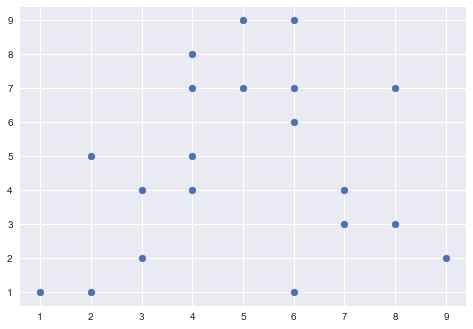

In [19]:
plt.scatter(x, y)

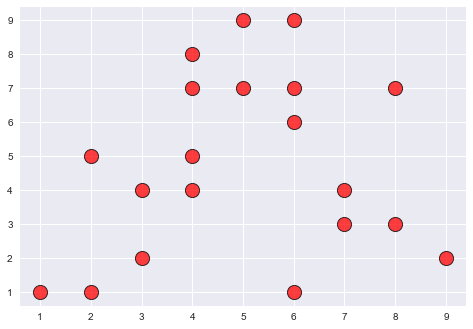

In [22]:
plt.scatter(x, y, s=200, c='red', edgecolor='black', linewidth=1, alpha=0.75)

A plotunkon az x-z pontokon kívül **akár még 2 másik dimenziót** is megjeleníthetünk a markerek méretét és színét változtatva:

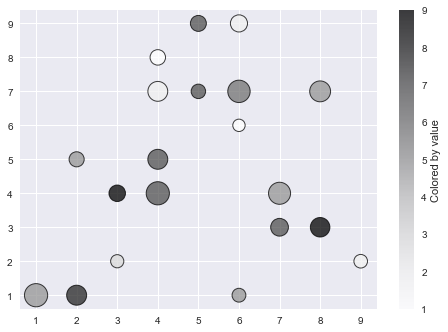

In [53]:
colors = [7, 5, 9, 7, 5, 7, 2, 5, 3, 7, 1, 2, 8, 1, 9, 2, 5, 6, 7, 5]
sizes = [209, 486, 381, 255, 191, 315, 185, 228, 174, 538, 239, 394, 399, 153, 273, 293, 436, 501, 397, 539]
plt.scatter(x, y, s=sizes, c=colors, edgecolor='black', linewidth=1, alpha=0.75)  #cmap='Greens'

cBar = plt.colorbar()
cBar.set_label('Colored by value')

# Available colormaps:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

Nézzünk meg egy valós adatsort, ami 1970 és 1981 között gyártott autók fogyaztását tartlamazza.

In [55]:
import seaborn as sns

mpg = sns.load_dataset('mpg')
mpg['l/100km'] = 235.215 / mpg['mpg']
mpg['weight-kg'] = mpg['weight'] * 0.45359
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,l/100km,weight-kg
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,13.067500,1589.37936
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.681000,1675.10787
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,13.067500,1558.53524
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,14.700938,1557.17447
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,13.836176,1564.43191


In [100]:
mpg['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

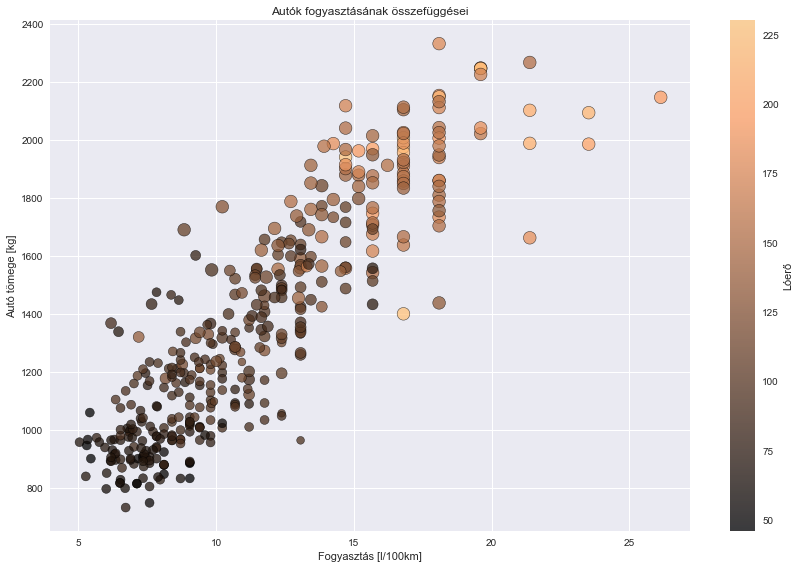

In [64]:
fig, ax = plt.subplots(figsize=(12,8))

mpgPlot = ax.scatter(mpg['l/100km'], mpg['weight-kg'], alpha=0.75, edgecolor='black', linewidth=0.5,
                     c=mpg['horsepower'], cmap='copper', s=mpg['cylinders']*20)
ax.set_xlabel('Fogyasztás [l/100km]')
ax.set_ylabel('Autó tömege [kg]')
ax.set_title('Autók fogyasztásának összefüggései')
cBar = fig.colorbar(mpgPlot)
cBar.set_label('Lóerő')
plt.tight_layout()

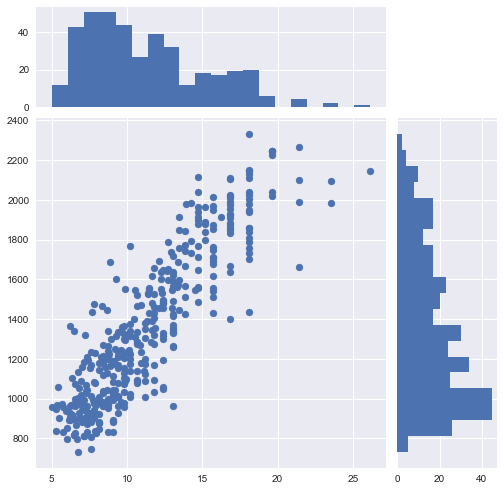

In [68]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

#     # now determine nice limits by hand:
#     binwidth = 0.25
#     xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
#     lim = (int(xymax/binwidth) + 1) * binwidth

#     bins = np.arange(-lim, lim + binwidth, binwidth)
#     ax_histx.hist(x, bins=bins)
#     ax_histy.hist(y, bins=bins, orientation='horizontal')
    ax_histx.hist(x, bins=20)
    ax_histy.hist(y, bins=20, orientation='horizontal')
    
#--------------------------- 
# start with a square Figure
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(mpg['l/100km'], mpg['weight-kg'], ax, ax_histx, ax_histy)

plt.show()

## Boxplot - Violinplot
A box és violin plot kategorizált adatok eloszlását mutatja. Segítségükkel jól összehasonlíthatóak a különböző kategóriák. A boxplot a kvartilisek elhelyezkedését jeleníti meg, a violinplot pedig az egész eloszlásról ad infomációt.

In [80]:
np.sort(mpg['cylinders'].unique())

array([3, 4, 5, 6, 8], dtype=int64)

In [83]:
cylinders = np.sort(mpg['cylinders'].unique())
data = [mpg[mpg['cylinders']==cylinder]['l/100km'] for cylinder in cylinders]

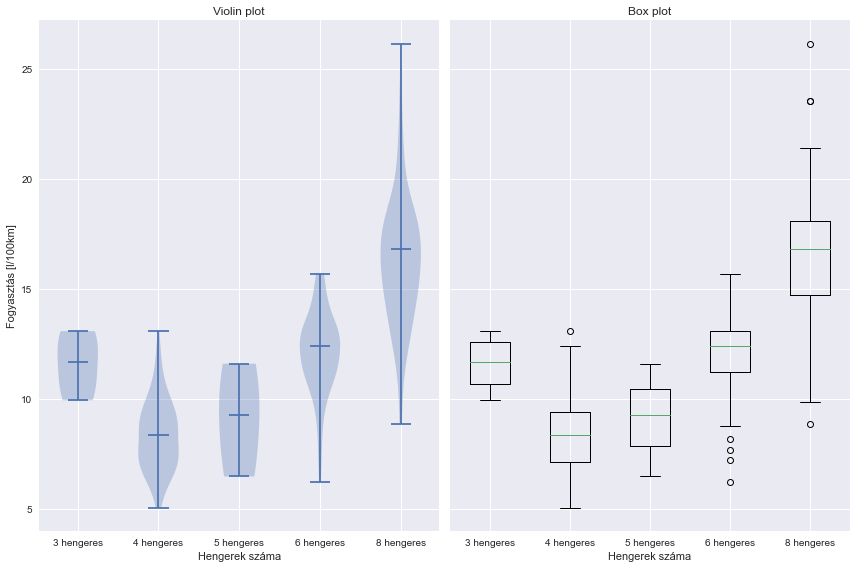

In [97]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)

# plot violin plot
axs[0].violinplot(data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')
axs[0].set_ylabel('Fogyasztás [l/100km]')

# plot box plot
axs[1].boxplot(data)
axs[1].set_title('Box plot')


# add x-tick labels
plt.setp(axs, xticks=[y + 1 for y in range(len(data))],
         xticklabels=[f'{cylinder} hengeres' for cylinder in cylinders],
         xlabel='Hengerek száma')
plt.tight_layout()
plt.show()

Figyelni kell azonban az egyes kategóriákba sorolt elemek számára:

In [101]:
for dat, henger in zip(data, cylinders):
    print(f'A {henger} hengeres autókból {len(dat)} darab volt.')

A 3 hengeres autókból 4 darab volt.
A 4 hengeres autókból 204 darab volt.
A 5 hengeres autókból 3 darab volt.
A 6 hengeres autókból 84 darab volt.
A 8 hengeres autókból 103 darab volt.
